In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Build a ML predictive model to predict whether customer will leave/exit or continue using the banking service using the following bank data**

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [161]:
df['Exited'].unique()

array([1, 0])

In [162]:
#drop the columns not required to build a ml model

df1 = df.drop(columns = ['RowNumber',	'CustomerId', 'Surname'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EDA - Exploratory Data Analysis**

* Univariate Analysis - Analysing one data column at a time
* Bivariate Analysis - Analysing two data column at a time and their effect on each other
* Multivariate Analysis - Analysing mutilple data column at a time and their effect on each other

**Univariate Analysis**

    * Categorical column
    * Continous column

In [163]:
#Categorical

print(df1['Geography'].unique())
print(df1['Gender'].unique())
print(df1['NumOfProducts'].unique())
print(df1['HasCrCard'].unique())
print(df1['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [164]:
#frequency of categorical values

print(df1['Geography'].value_counts())
print()
print(df1['Gender'].value_counts())
print()
print(df1['NumOfProducts'].value_counts())
print()
print(df1['HasCrCard'].value_counts())
print()
print(df1['IsActiveMember'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


<Axes: xlabel='Geography'>

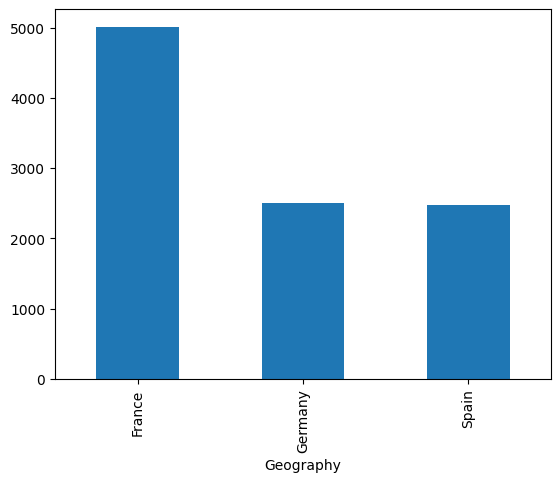

In [165]:
df1['Geography'].value_counts().plot.bar()

<Axes: ylabel='count'>

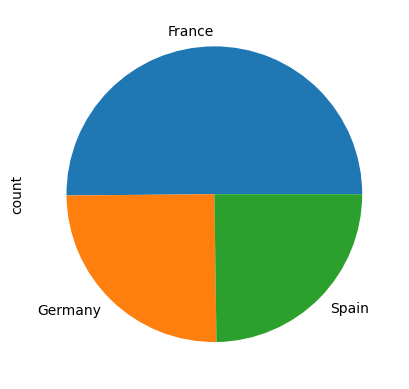

In [166]:
df1['Geography'].value_counts().plot.pie()

<Axes: xlabel='Gender'>

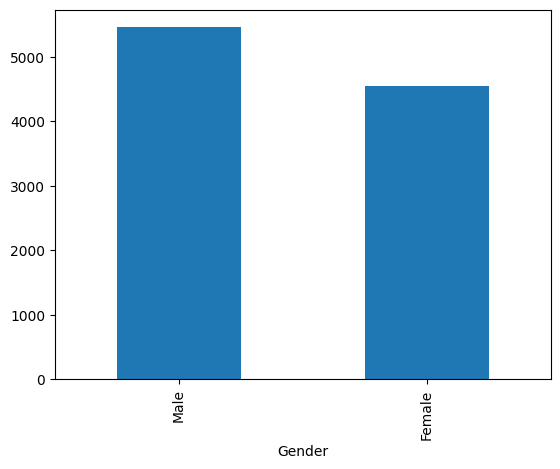

In [167]:
df1['Gender'].value_counts().plot.bar()

<Axes: xlabel='NumOfProducts'>

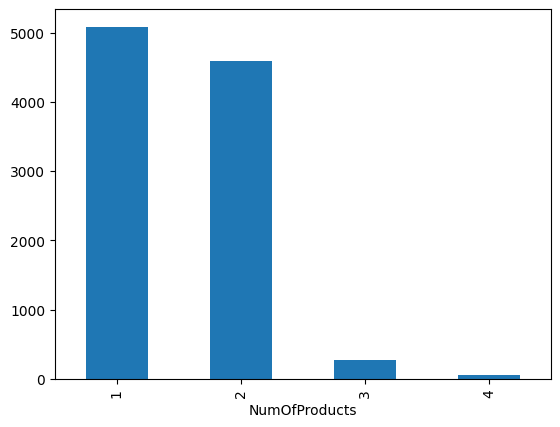

In [168]:
df1['NumOfProducts'].value_counts().plot.bar()

<Axes: xlabel='HasCrCard'>

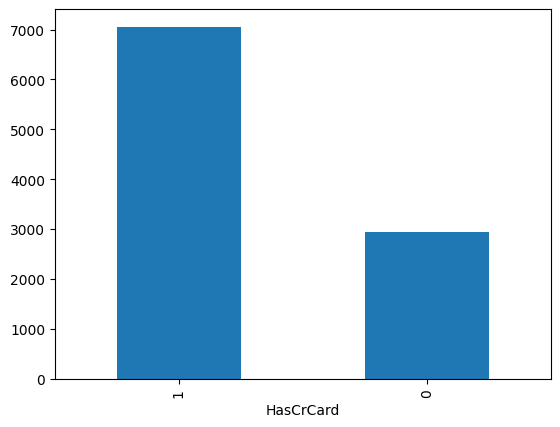

In [169]:
df1['HasCrCard'].value_counts().plot.bar()

<Axes: xlabel='IsActiveMember'>

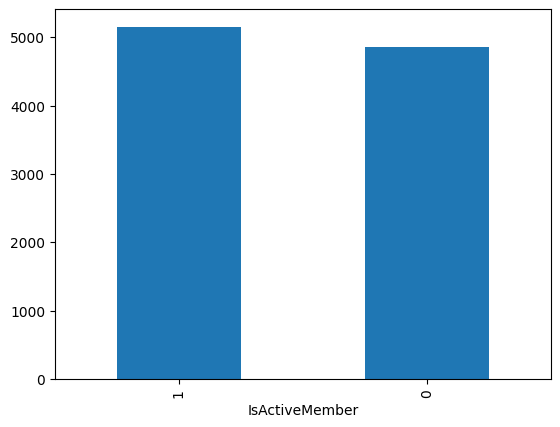

In [170]:
df1['IsActiveMember'].value_counts().plot.bar()

**NumOfProduct column**

    * it has approx 50% samples representing category 1
    * approx 45% samples with category 2
    * rest 5% is category 3 & 4
    * as for category 3 & 4 we have very less samples in comparasion to 1 & 2
    * we can combine 2,3 & 4 to handle biasness

In [171]:
#user define function to combine 2,3 & 4

def combine_numofproducts(value):
    if value == 1:
        return value
    else:
        return 2

In [172]:
combine_numofproducts(1)

1

In [173]:
df1['NumOfProducts'] = df1['NumOfProducts'].apply(combine_numofproducts)

<Axes: xlabel='NumOfProducts'>

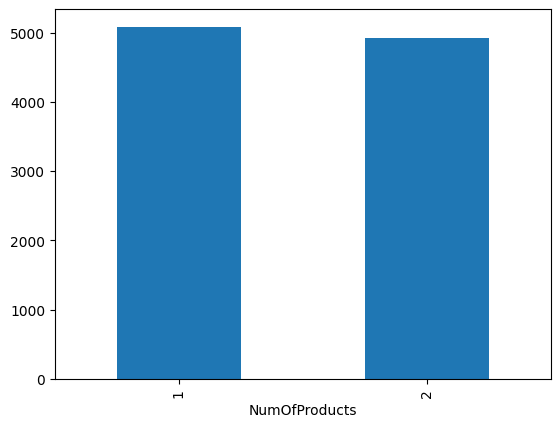

In [174]:
df1['NumOfProducts'].value_counts().plot.bar()

**Univariate Analysis on Continous columns**

In [175]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [176]:
print('Credit Score')
print(df1['CreditScore'].mean())
print(df1['CreditScore'].min())
print(df1['CreditScore'].max())
print()
print('Age')
print(df1['Age'].mean())
print(df1['Age'].min())
print(df1['Age'].max())
print()
print('Balance')
print(df1['Balance'].mean())
print(df1['Balance'].min())
print(df1['Balance'].max())
print()

Credit Score
650.5288
350
850

Age
38.9218
18
92

Balance
76485.889288
0.0
250898.09



**Histogram plot for continous values**

<Axes: ylabel='Frequency'>

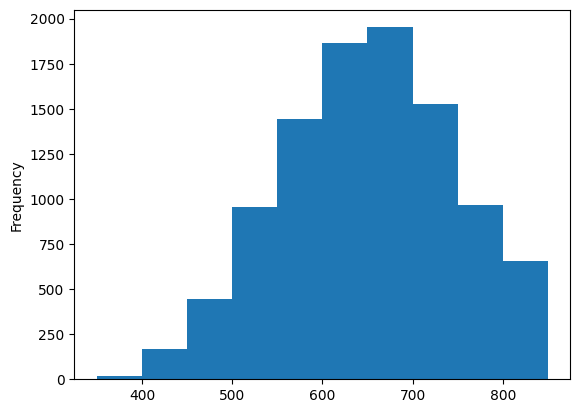

In [177]:
df1['CreditScore'].plot.hist()

<Axes: ylabel='Frequency'>

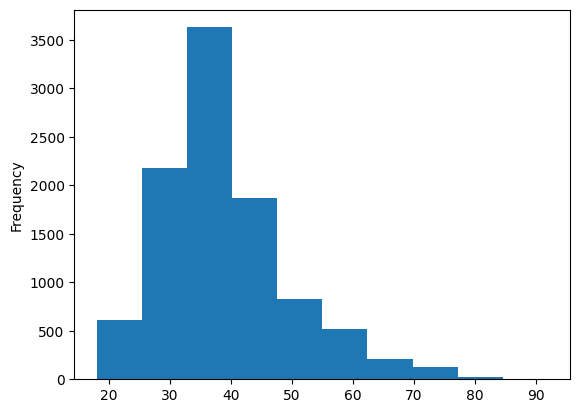

In [178]:
df1['Age'].plot.hist()

<Axes: ylabel='Frequency'>

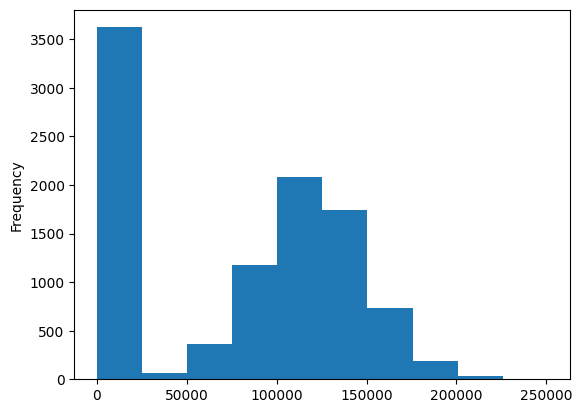

In [179]:
df1['Balance'].plot.hist()

<Axes: ylabel='Frequency'>

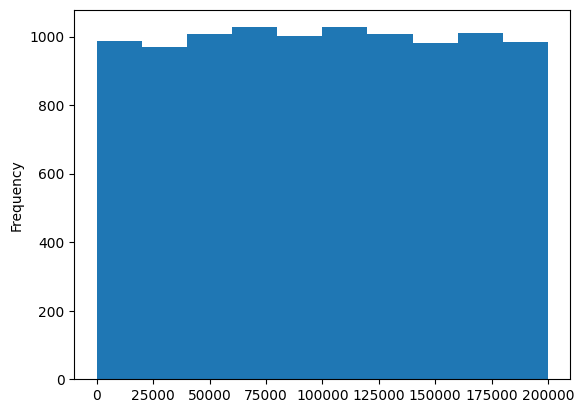

In [180]:
df1['EstimatedSalary'].plot.hist()

**Bivariate Analysis**

    * categorical & categorical
    * categorical & continous
    * continous & continous

In [181]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,2,1,0,113931.57,1


In [182]:
#categorical vs categorical

pd.crosstab(df1['Geography'] , df1['Gender'])

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


<Axes: xlabel='Geography'>

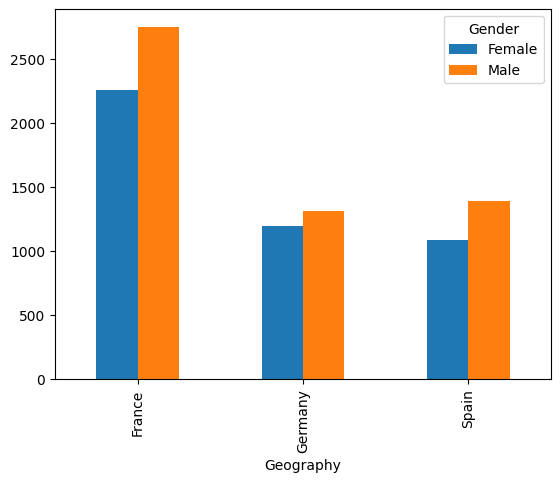

In [183]:
pd.crosstab(df1['Geography'] , df1['Gender']).plot.bar()

In [184]:
#Exit of customers from each country
pd.crosstab(df1['Geography'], df1['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Geography'>

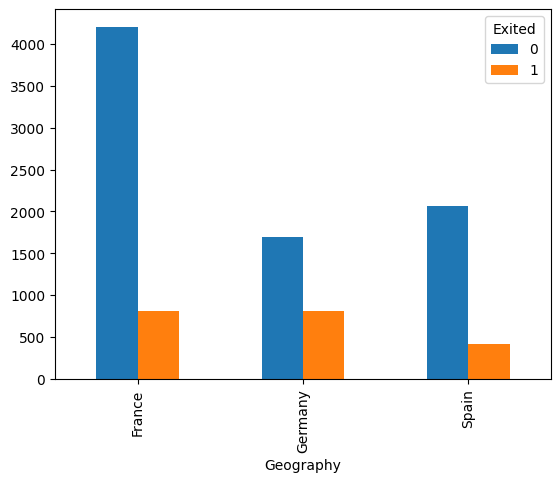

In [185]:
pd.crosstab(df1['Geography'], df1['Exited']).plot.bar()

<Axes: xlabel='Gender'>

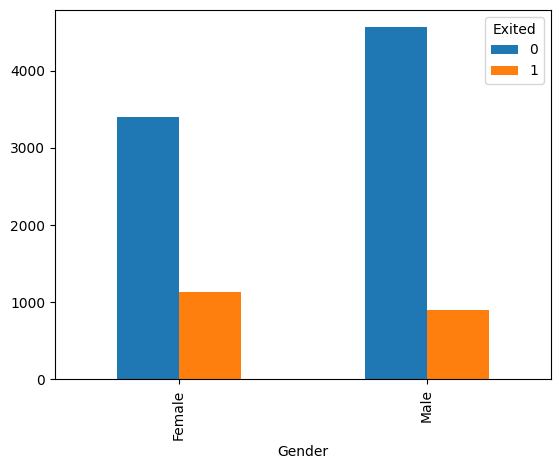

In [186]:
#Exit of customer as 'Male' and 'Female'
pd.crosstab(df1['Gender'], df1['Exited']).plot.bar()

<Axes: xlabel='NumOfProducts'>

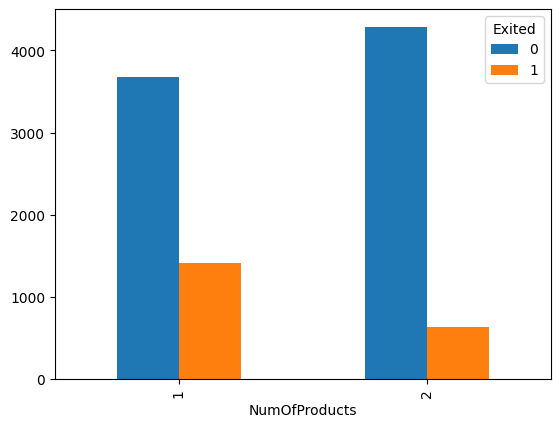

In [187]:
#Exit of Customer as numofproducts 1 and 2
pd.crosstab(df1['NumOfProducts'], df1['Exited']).plot.bar()

<Axes: xlabel='HasCrCard'>

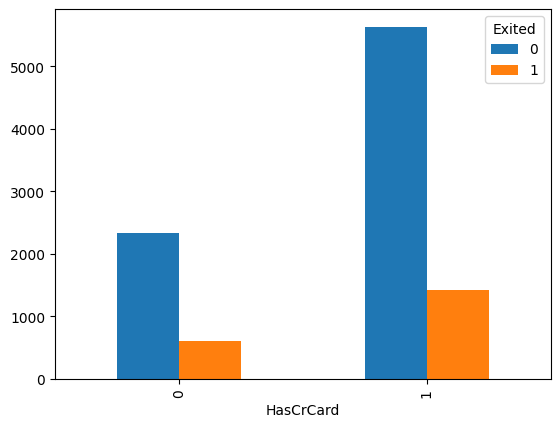

In [188]:
#Exit of customers as "Has cr card = 1" and "Has cr card = 0"
pd.crosstab(df1['HasCrCard'], df1['Exited']).plot.bar()

In [189]:
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [190]:
df1['Age'].mean()

np.float64(38.9218)

In [191]:
df1.Age.mean()

np.float64(38.9218)

In [192]:
#Categorical & Continous

#Average age of customers from each geographical location
#Geography => categorical
#Age => Continous

#groupby()

df1.groupby('Geography').Age.mean()

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64

In [193]:
#Average age of Male & female customers
df1.groupby('Gender').Age.mean()

Gender
Female    39.238389
Male      38.658237
Name: Age, dtype: float64

In [194]:
df1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [195]:
#Average balance if exit = 1 and average balance if exit = 0

df1.groupby('Exited').Balance.mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

<Axes: xlabel='Exited'>

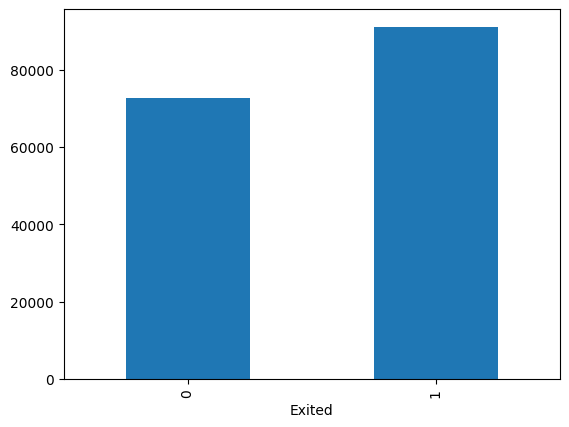

In [196]:
df1.groupby('Exited').Balance.mean().plot.bar()

In [197]:
#Average estimated_salary if exit = 1 and average estimated_salary if exit = 0

df1.groupby('Exited')['EstimatedSalary'].mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

In [198]:
df1.groupby('Exited')['EstimatedSalary'].agg(['mean' , 'min' , 'max' , 'count'])

,mean,min,max,count
Exited,,,,
0,99738.391772,90.07,199992.48,7963
1,101465.677531,11.58,199808.10,2037


In [199]:
#Average , Minimum , Maximum age of customers for exit = 0 and exit = 1

df1.groupby('Exited')['Age'].agg(['mean' , 'min' , 'max'])

,mean,min,max
Exited,,,
0,37.408389,18,92
1,44.837997,18,84


In [200]:
#Continous & Continous

#correlation between Age and Balance

df1[['CreditScore' , 'Age' , 'Balance' , 'EstimatedSalary' ]].corr()

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.006268,-0.001384
Age,-0.003965,1.000000,0.028308,-0.007201
Balance,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.012797,1.000000


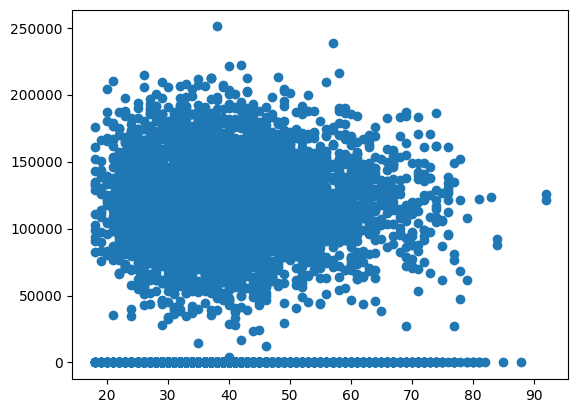

In [201]:
plt.scatter(df1['Age'] , df1['Balance'])
plt.show()

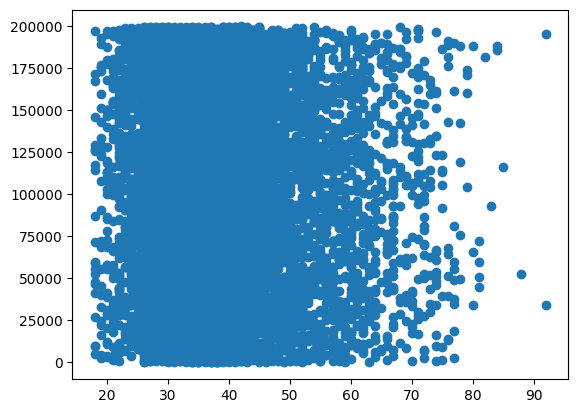

In [202]:
plt.scatter(df1['Age'] , df1['EstimatedSalary'])
plt.show()

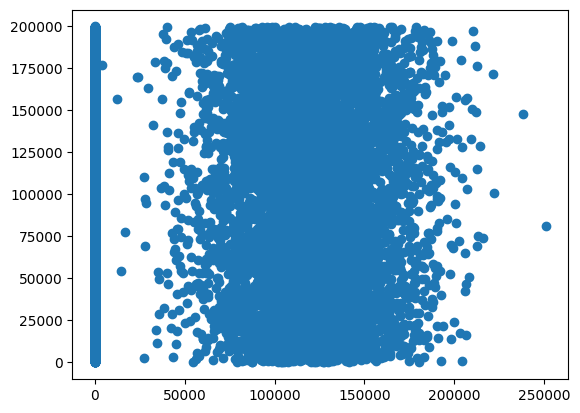

In [203]:
plt.scatter(df1['Balance'] , df1['EstimatedSalary'])
plt.show()

In [204]:
#Calculation of corelation
x1 = df1['Balance']
x2 = df1['EstimatedSalary']

n1 = ((x1 - x1.mean())*(x2 - x2.mean())).sum()

d1 = (((x1 - x1.mean())**2).sum() * ((x2 - x2.mean())**2).sum())**0.5

c1 = n1/d1
print(c1)

0.012797496340555693


In [205]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,2,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [206]:
#Create a copy of your data and store into a new variable
df2 = df1.copy()

**Label Encoding**

    * On Gender column

In [207]:
df2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [208]:
df2['Gender'] = df2['Gender'].map({'Female' : 0, 'Male': 1})

**One-hot encoding**

    * On Geography column

In [209]:
geo_encoded = pd.get_dummies(df2['Geography'], dtype = int)
geo_encoded

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


**combine df2 & geo_encoded**

    * for horizontal stacking use axis = 1

In [210]:
df3 = pd.concat((df2,geo_encoded) , axis = 1)
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,2,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [211]:
#drop the 'Geography' column as it is already encoded

df3 = df3.drop(columns = ['Geography'])
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,2,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Define X & y as features and labels**

    * X = all columns but not 'Exited'
    * y = only 'Exited' column

In [212]:
X = df3.drop(columns = ['Exited'])
y = df3['Exited']

In [213]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

**We have biased dataset so we need to resample it for a balanced and unbiased predictive model**

    * downsampling - RandomUnderSampler
    * upsampling - SMOTE

In [214]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler()

Xr,yr = ros.fit_resample(X,y)

In [215]:
print(yr.value_counts())

Exited
0    2037
1    2037
Name: count, dtype: int64


In [216]:
#Over Sampling

from imblearn.over_sampling import SMOTE

ros = SMOTE()

Xr,yr = ros.fit_resample(X,y)

In [217]:
print(yr.value_counts())

Exited
1    7963
0    7963
Name: count, dtype: int64


**Split xtrain & xtest**

In [218]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xr,yr,train_size = 0.75)

In [219]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

(10000, 12)
(11944, 12)
(3982, 12)


**Import algorithm (KNN) and train model**

In [220]:
from sklearn.neighbors import KNeighborsClassifier

model_A = KNeighborsClassifier(n_neighbors = 5)

model_A.fit(xtrain,ytrain)

KNeighborsClassifier()

**Check model accuracy**

In [221]:
ytrain_pred = model_A.predict(xtrain) #predicted values on training data

ytest_pred = model_A.predict(xtest)   #predicted values on test data

In [222]:
print("Accuracy of model on train data")
print((ytrain == ytrain_pred).sum()/len(xtrain))

Accuracy of model on train data
0.794959812458138


In [223]:
print("Accuracy of model on test data")
print((ytest == ytest_pred).sum()/len(xtest))

Accuracy of model on test data
0.6735308890005023


**ML Model Performance analysis using confusion matrix**

In [224]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytrain , ytrain_pred))

[[4358 1627]
 [ 822 5137]]


In [225]:
print(confusion_matrix(ytest , ytest_pred))

[[1169  809]
 [ 491 1513]]
